In [1]:
import yfinance as yf
import pandas as pd

In [2]:
#Here add the tickers you want to compare
tickers = ['SPY', 'AMD', 'NVDA', 'AAPL', 'MU', 'ABBV', 'PEP', 'SBUX', 'PG', 'PSA']

In [3]:
#Replace any date you want to start, as long as it is available in Yahoo Finance
df = yf.download(tickers=tickers, start="2017-06-17",)   # group_by='ticker')

[*********************100%***********************]  10 of 10 completed


In [4]:
df

Adj Close                                                 \
                  AAPL        ABBV         AMD         MU        NVDA   
Date                                                                    
2017-06-19   34.684666   57.241253   11.930000  31.123266   38.908276   
2017-06-20   34.369434   57.144970   12.640000  30.754173   38.851391   
2017-06-21   34.573265   57.241253   13.980000  31.931271   39.440014   
2017-06-22   34.516380   58.717625   14.380000  31.811565   39.167953   
2017-06-23   34.670444   58.284344   14.170000  31.651960   38.045132   
...                ...         ...         ...        ...         ...   
2022-02-17  168.880005  144.970001  112.370003  93.730003  245.070007   
2022-02-18  167.300003  144.029999  113.830002  90.800003  236.419998   
2022-02-22  164.320007  145.559998  115.650002  90.570000  233.899994   
2022-02-23  160.070007  146.759995  109.760002  87.309998  223.869995   
2022-02-24  162.740005  145.270004  116.610001  88.830002  237.479996   

                                                                       ...  \
                   PEP          PG         PSA       SBUX         SPY  ...   
Date                                                                   ...   
2017-06-19  102.651161   78.726143  180.903000  55.481918  225.992279  ...   
2017-06-20  103.228783   78.524643  180.877365  54.534443  224.468155  ...   
2017-06-21  102.764931   78.323128  181.347168  54.625549  224.412766  ...   
2017-06-22  101.653442   77.998985  180.390442  54.215572  224.311142  ...   
2017-06-23  102.362350   78.340660  182.039093  54.488884  224.579025  ...   
...                ...         ...         ...        ...         ...  ...   
2022-02-17  166.750000  159.820007  346.059998  93.050003  437.059998  ...   
2022-02-18  167.710007  159.899994  343.559998  93.339996  434.230011  ...   
2022-02-22  168.350006  157.929993  342.380005  93.110001  429.570007  ...   
2022-02-23  166.690002  155.960007  353.450012  89.650002  421.950012  ...   
2022-02-24  163.789993  151.759995  351.630005  91.010002  428.299988  ...   

               Volume                                                     \
                 AAPL      ABBV        AMD        MU       NVDA      PEP   
Date                                                                       
2017-06-19  130165600   6396300   61803600  24915000   77817600  2436600   
2017-06-20   99600400   6542800  118001500  25793300  109544400  3703500   
2017-06-21   85063200   6096800  188796100  30579000   68265200  3767100   
2017-06-22   76425200   9998900  149594200  23050800   46913200  3288100   
2017-06-23  141757600   7064500  200777300  45323800  108858800  3453400   
...               ...       ...        ...       ...        ...      ...   
2022-02-17   69589300   5486600   98179600  17943300   81059500  5156800   
2022-02-18   82614200   7584000  114193900  19516000   75966400  5181600   
2022-02-22   91162800  11576800  141648500  24825700   63342200  7733900   
2022-02-23   90009200   9271000  120299400  19135400   56651100  5812800   
2022-02-24  140762200  12069700  142494800  24459500   73404600  8884500   

                                                   
                  PG      PSA     SBUX        SPY  
Date                                               
2017-06-19   5246200   726600  6778000   65123800  
2017-06-20   5674200   937300  6985700   56906400  
2017-06-21   4164500   585900  6027600   55977600  
2017-06-22   4536700   631900  5602000   44148100  
2017-06-23   8782100   703800  6469500   66986800  
...              ...      ...      ...        ...  
2022-02-17   7925500   693400  6578200  102259100  
2022-02-18   8061600   681900  6208500  132454300  
2022-02-22   8179500   802300  8622500  124391800  
2022-02-23   6273000  1342100  9674800  132578000  
2022-02-24  13141500  1490500  9256400  213570500  

[1181 rows x 60 columns]

In [5]:
df = df['Close']
df

,AAPL,ABBV,AMD,MU,NVDA,PEP,PG,PSA,SBUX,SPY
Date,,,,,,,,,,
2017-06-19,36.584999,71.339996,11.930000,31.200001,39.330002,117.290001,89.860001,211.779999,60.900002,244.660004
2017-06-20,36.252499,71.220001,12.640000,30.830000,39.272499,117.949997,89.629997,211.750000,59.860001,243.009995
2017-06-21,36.467499,71.339996,13.980000,32.009998,39.867500,117.419998,89.400002,212.300003,59.959999,242.949997
2017-06-22,36.407501,73.180000,14.380000,31.889999,39.592499,116.150002,89.029999,211.179993,59.509998,242.839996
2017-06-23,36.570000,72.639999,14.170000,31.730000,38.457500,116.959999,89.419998,213.110001,59.810001,243.130005
...,...,...,...,...,...,...,...,...,...,...
2022-02-17,168.880005,144.970001,112.370003,93.730003,245.070007,166.750000,159.820007,346.059998,93.050003,437.059998
2022-02-18,167.300003,144.029999,113.830002,90.800003,236.419998,167.710007,159.899994,343.559998,93.339996,434.230011
2022-02-22,164.320007,145.559998,115.650002,90.570000,233.899994,168.350006,157.929993,342.380005,93.110001,429.570007


```py
for ticker in tickers:
    individual_normalized = normalize_data(df[ticker])
    df[ticker] = individual_normalized
```

```py
#normalized_df[['SPY', 'AMD', 'SBUX']].plot(figsize=(20,10))
df.plot(figsize=(20,10))
```

In [6]:
## Set up initial investment per stock
init_investment = 100
num_shares = {}
for ticker in tickers:
    num_shares[ticker] = init_investment / df[ticker].iat[0]

In [7]:
num_shares

{'SPY': 0.40873047700148896,
 'AMD': 8.38222945867113,
 'NVDA': 2.5425882365721306,
 'AAPL': 2.7333607353414378,
 'MU': 3.205128126752606,
 'ABBV': 1.4017382272682746,
 'PEP': 0.8525875967212272,
 'SBUX': 1.6420360836527386,
 'PG': 1.112842191417483,
 'PSA': 0.47218812246860664}

In [8]:
performance_df = pd.DataFrame(columns=tickers,)
for ticker in tickers:
    performance_df[ticker] = df[ticker] * num_shares[ticker]
    

In [9]:
performance_df

,SPY,AMD,NVDA,AAPL,MU,ABBV,PEP,SBUX,PG,PSA
Date,,,,,,,,,,
2017-06-19,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2017-06-20,99.325591,105.951383,99.853794,99.091156,98.814100,99.831798,100.562704,98.292281,99.744043,99.985835
2017-06-21,99.301068,117.183564,101.366637,99.678829,102.596146,100.000000,100.110834,98.456482,99.488094,100.245540
2017-06-22,99.256108,120.536461,100.667422,99.514834,102.211534,102.579204,99.028051,97.717565,99.076339,99.716684
2017-06-23,99.374643,118.776192,97.781588,99.959001,101.698714,101.822264,99.718645,98.210180,99.510347,100.628011
...,...,...,...,...,...,...,...,...,...,...
2022-02-17,178.639741,941.911147,623.112118,461.609974,300.416670,203.209993,142.168982,152.791463,177.854447,163.405421
2022-02-18,177.483040,954.149195,601.118706,457.291259,291.025644,201.892355,142.987472,153.267642,177.943460,162.224950
2022-02-22,175.578354,969.404850,594.711373,449.145856,290.288453,204.037013,143.533127,152.889981,175.751159,161.667772


<AxesSubplot:title={'center':'SPY vs Top 9 Stocks'}, xlabel='Date'>

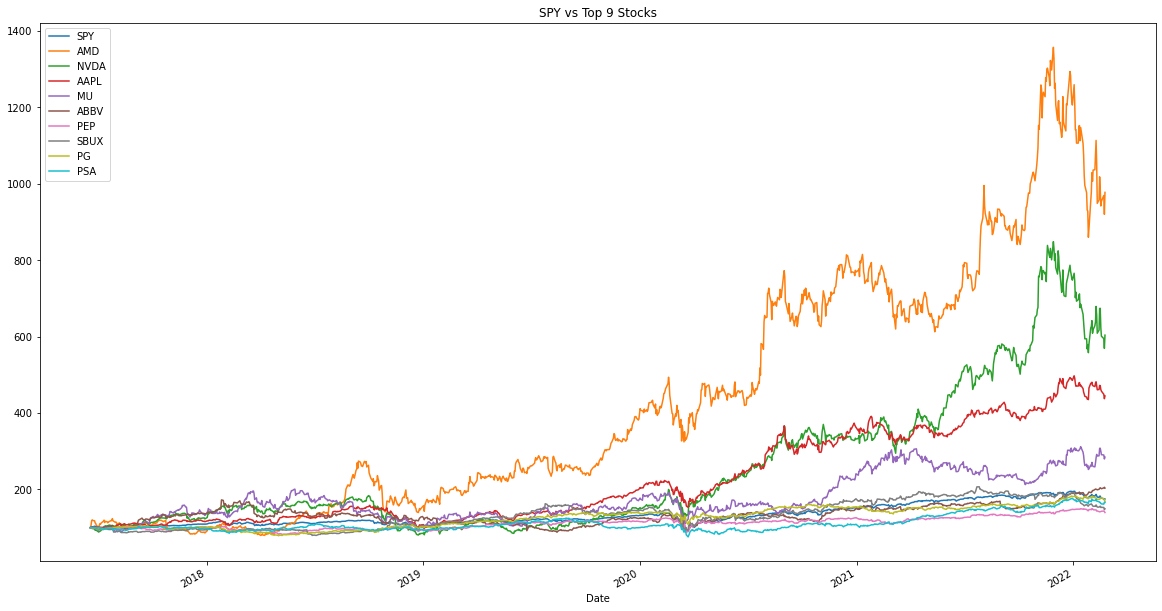

In [13]:
performance_df.plot(figsize=(20,11), title='SPY vs Top 9 Stocks')

<AxesSubplot:title={'center':'SPY vs Top 5 Stocks'}, xlabel='Date'>

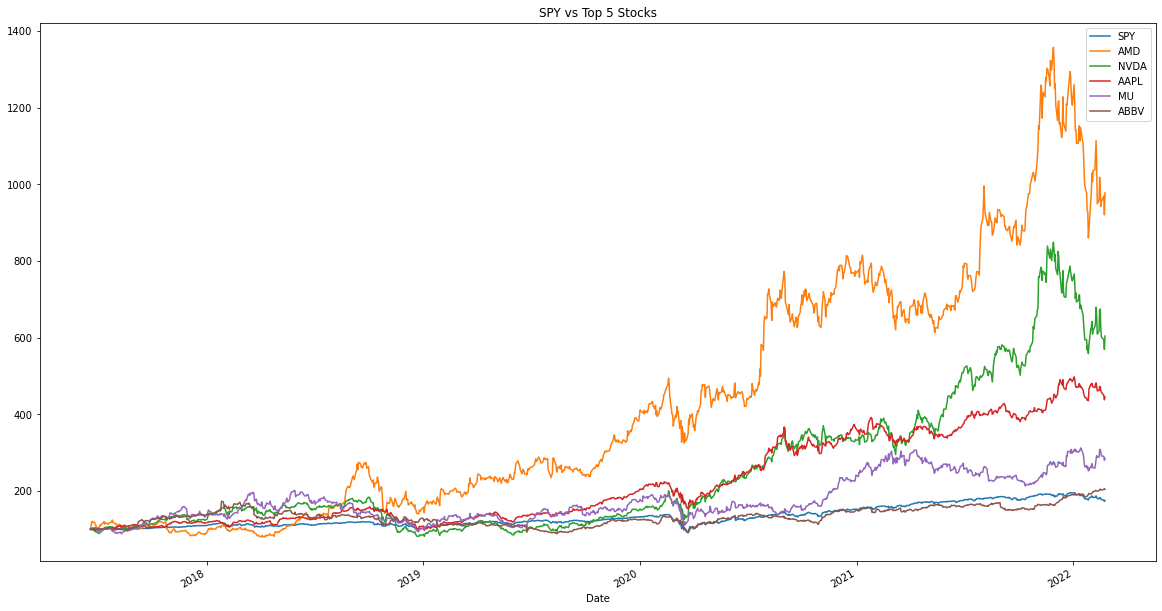

In [12]:
performance_df[['SPY','AMD','NVDA','AAPL','MU','ABBV']].plot(figsize=(20,11), title="SPY vs Top 5 Stocks")

<AxesSubplot:title={'center':'SPY vs Notable Mentions'}, xlabel='Date'>

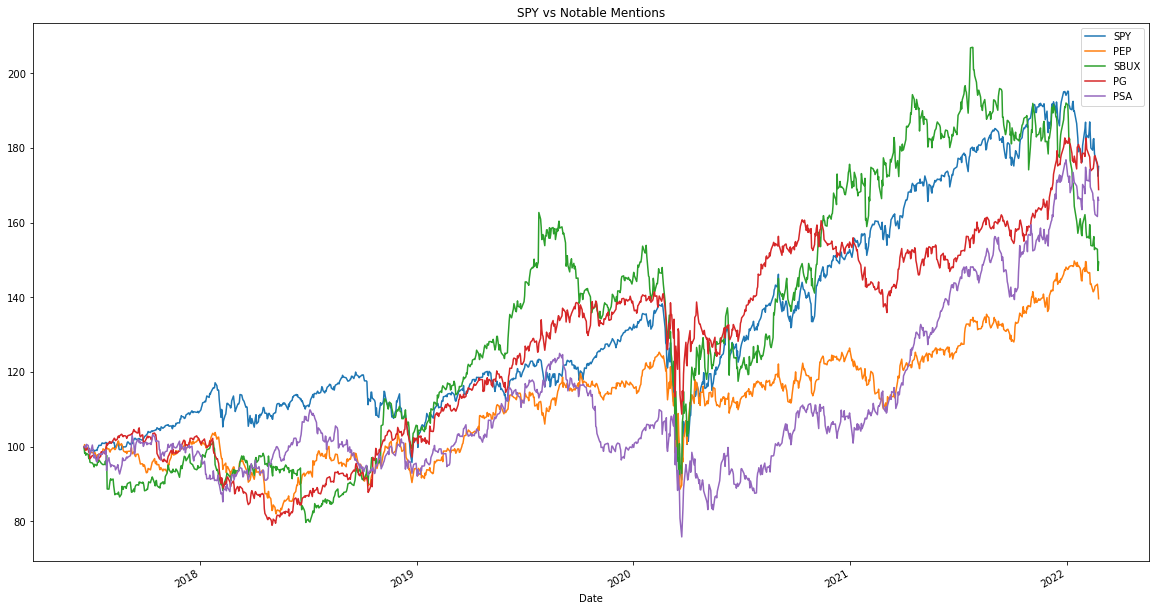

In [14]:
performance_df[['SPY','PEP','SBUX','PG','PSA']].plot(figsize=(20,11), title="SPY vs Notable Mentions")